In [1]:
import cobra
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from MetabolicModelParser import MetabolicModelParser

In [13]:
M=313

In [2]:
mmp = MetabolicModelParser(filepath_to_model="./Data/recon_2.2.xml", M=M)

SBML model loaded.
Recations Map created.
Genes Map created.
Complexes Map created.
Metabolites Map created.
Bounds assigned.


In [3]:
mmp.make_and_save_stoichiometric_data(folder_to_save='./Data', use_fva=False,save_kernel_projector=False,save=True,mode=)

Stochiometric data saved.


In [4]:
A=mmp.s_matrix
A.shape

(6124, 8593)

In [5]:
A_flat=A.flatten()

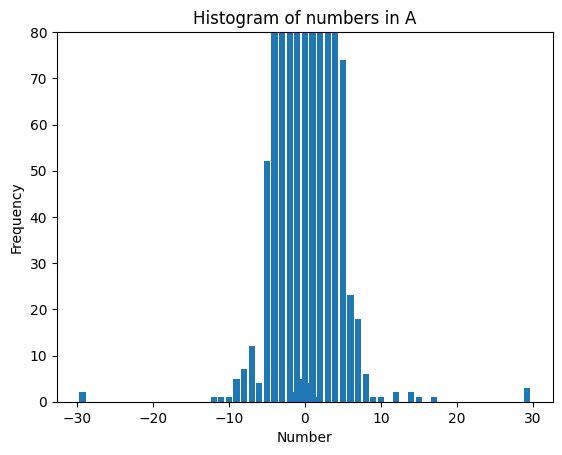

<Figure size 4000x500 with 0 Axes>

In [38]:
# importing the collections module
import collections

# getting the elements frequencies using Counter class
elements_count = collections.Counter(A_flat)
# elements_count_no_inf=collections.Counter(A_flat_no_inf)
fig=plt.bar(elements_count.keys(),elements_count.values())
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Histogram of numbers in A')
plt.ylim([0, 80])
# plt.xlim([-M,M])
# plt.xticks(np.arange(-M,M,2),fontsize=8,rotation=90)
plt.figure(figsize=(40, 5))
plt.show()

In [18]:
A_flat_no_inf=A_flat[abs(A_flat)!=mmp.M ]

In [19]:
A_flat_no_inf

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
# Create a pandas dataframe from the histogram values
df_freq = pd.DataFrame(elements_count.items(),columns=['Number','Frequency'])

# Display the dataframe
df_freq

,Number,Frequency
0,0.000,52589093
1,1.000,16121
2,-1.000,16397
3,2.000,608
4,-2.000,442
...,...,...
73,-0.014,1
74,-0.058,1
75,-0.071,1
76,-0.097,1


In [35]:
df_freq.sort_values('Frequency',axis=0,ascending=False)
df_freq.head(10)

,Number,Frequency
0,0.0,52589093
1,1.0,16121
2,-1.0,16397
3,2.0,608
4,-2.0,442
5,-3.0,116
6,-5.0,52
7,3.0,185
8,4.0,152
9,6.0,23


In [36]:
df=pd.DataFrame(A_flat)
df.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [37]:
df.describe()

,0
count,5.262353e+07
mean,1.132390e-05
std,3.290658e-02
min,-2.925042e+01
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.925042e+01


In [39]:
zero_cols = np.argwhere(np.all(A == 0, axis=0))
zero_cols

In [41]:
zero_rows = np.argwhere(np.all(A == 0, axis=1))
zero_rows

array([], shape=(0, 1), dtype=int64)